# 10. 聚类

## 10.1. 聚类任务
在无监督学习(unsupervised learning)中，训练样本的标记信息是未知的，目标是通过对无标记训练样本的学习来揭示数据的内在性质及规律，为进一步的数据分析提供基础。此类学习任务中研究最多、应用最广的是“聚类”(clustering).

聚类试图将数据集中的样本划分为若干个通常是不相交的子集，每个子集被称为一个“簇”(cluster)。通过这样的划分，每个簇可能对应于一些潜在的概念(类别)，例如“浅色瓜”、“深色瓜”等。**需要说明的是，这些概念对聚类算法而言事先是未知的，聚类过程仅能自动形成簇，簇所对应的概念语义需要使用者来把握和命名**

聚类既能作为一个单独的过程，用于寻找数据内在的分布结构，也可作为分类等其他学习任务的前驱过程。例如，在一些商业应用中需对新用户的类型进行判别，但定义“用户类型”对商家来说可能不太容易，此时可先对用户数据进行聚类，根据聚类结果将每个簇定义为一个类，然后再基于这些类训练分类模型，用于判别新用户的类型。

## 10.2. 性能度量
聚类的性能度量大致有两类。一类是将聚类结果与某个“参考模型”(reference model)进行比较，称为“外部指标”(external index);另一类是直接考察聚类结果而不利用任何参考模型，称为“内部指标”(internal index)。

### 10.2.1. 外部指标

对数据集$D=\{x_1,x_2,...,x_m\}$，假定通过聚类给出的簇划分为$C=\{C_1,C2,...,C_k\}$，参考模型给出的簇划分为$C^*=\{C_1^*,C_2^*...,C_s^*\}$(通常$k\neq s$)。相应的，令$\lambda$与$\lambda^*$分别表示$C$与$C^*$对应的簇标记向量。将样本两两配对考虑，定义：

$
a = |SS|, SS = \{(x_i,x_j)|\lambda_i=\lambda_j, \lambda_i^* = \lambda_j^*, i<j\} \\
b = |SD|, SD = \{(x_i,x_j)|\lambda_i=\lambda_j, \lambda_i^* \neq \lambda_j^*, i<j\} \\
c = |DS|, SS = \{(x_i,x_j)|\lambda_i \neq \lambda_j, \lambda_i^* = \lambda_j^*, i<j\} \\
d = |DD|, DD = \{(x_i,x_j)|\lambda_i \neq \lambda_j, \lambda_i^* \neq \lambda_j^*, i<j\}
$

集合SS包含了在C中隶属相同簇且在$C^*$中也隶属相同簇的样本对，集合SD包含了在C中隶属相同簇但在$C^*$中隶属与不同簇的样本对。。。。。

由于每个样本对$(x_i, x_j) (i<j)$仅能出现在一个集合中，因此有$a+b+c+d=m(m-1)/2$成立

基于上面的4个式子，可以导出常用的聚类性能度量外部指标：

- Jaccard系数（Jaccard Coefficient, 简称JC）

$
JC = \frac{a}{a+b+c}
$

- FM指数（Fowlkes and Mallows Index, 简称FMI）

$
FMI = \sqrt{\frac{a}{a+b} \cdot \frac{a}{a+c}}
$

- Rand指数（Rand Index，简称RI）

$
RI = \frac{2(a+b)}{m(m-1)}
$ 

上述性能指标的结果均在[0,1]区间，值越大越好

### 10.2.2. 内部指标

考虑聚类结果的簇划分$C=\{C_1,C_2,...,C_k\}$，定义：

$
avg(C) = \frac{2}{|C|(|C|-1)} \sum_{1 \le i \le j \le |C|}dist(x_i,x_j) \\
diam(C) = \max_{1 \le i \le j \le |C|}dist(x_i,x_j) \\
d_{\min}(C_i, C_j) = \min_{x_i \in C_i,x_j \in C_j} dist(x_i,x_j) \\
d_{cen}(C_i, C_j) = dist(\mu_i, \mu_j)
$

其中dist()用于计算两个样本之间的距离；$\mu$代表簇C的中心点$\mu=\frac{1}{|C|}\sum_{1 \le i \le |C|}x_1$。显然avg(C)对应于簇C内样本间的平均距离，diam(C)对应于簇C内样本间的最远距离，$d_{\min}(C_i, C_j)$对应于簇$C_i$与簇$C_j$最近样本距离，$d_{cen}(C_i, C_j)$对应于簇$C_i$与簇$C_j$中心点间的距离。

基于上面的4个式子，可导出常用的内部指标：

- DB指数（Davies-Bouldin Index，简称DBI）

$
DBI = \frac{1}{k}\sum\limits_{i=1}^k \max\limits_{j \neq i} \big(\frac{avg(C_i)+avg(C_j)}{d_{cen}(C_i, C_j)}\big)
$

- Dunn指数（Dunn Index，简称DI）

$
DI = \min\limits_{i\le i \le j} \big\{ \min\limits_{j\neq i} \big(\frac{d_{\min}(C_i,C_j)}{\max_{1 \le l \le k}diam(C_l)}\big)    \big\}
$

DBI的值越小越好，DI的值越大越好

## 10.3. K-means算法

给定样本集$D=\{x_1,x_2,...,x_m\}$,k均值算法针对聚类所得簇划分$C=\{C_1,C_2,...,C_k\}$最小化平方误差

$
E = \sum\limits_{i=1}^k \sum\limits_{x\in C_i}||x=\mu_i||_2^2
$

其中$\mu_i = \frac{1}{|C_i|}\sum_x\in C_i$ x是簇$C_i$的均值向量，E值越小则簇内样本相似度越高。

![kmeans.png](kmeans.png)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# 计算两个向量之间的欧氏距离
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

# 为给定数据集构建一个包含k个随机质心的集合
def randCent(dataSet, k):
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k,1)
    return centroids

In [11]:
# 测试上面两个函数的正确性
datadf = pd.read_csv("testSet.txt", sep = '\t', header=None)
dataMat = np.mat(datadf)

In [12]:
min(dataMat[:,0])

matrix([[-5.379713]])

In [14]:
randCent(dataMat,2)

matrix([[ 2.35011413, -3.73947463],
        [-0.87448505,  4.4455945 ]])

In [25]:
distEclud(dataMat[0], dataMat[1])

5.184632816681332

In [26]:
# kmeans 算法
def kmeans(dataSet, k, distMeans=distEclud, createCent=randCent):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJ = distMeans(centroids[j,:], dataSet[i,:])
                if distJ < minDist:
                    minDist = distJ
                    minIndex = j
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            # axis = 0 表示沿矩阵的列方向进行均值计算
            centroids[cent,:] = np.mean(ptsInClust, axis = 0)
    return centroids, clusterAssment

In [50]:
myCentroids, clusterAssing = kmeans(dataMat, 4)

[[-3.72965733 -2.48907135]
 [ 0.17401484  4.87720701]
 [ 3.36156062  2.09204104]
 [ 0.89453673  4.27264426]]
[[-3.02774732 -2.48702036]
 [-2.43723225  3.09155775]
 [ 2.9920589  -0.44582903]
 [ 1.7058145   3.85942262]]
[[-3.19984738 -2.96423548]
 [-2.46154315  2.78737555]
 [ 2.96839327 -2.13784255]
 [ 2.51964406  3.40459212]]
[[-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]]


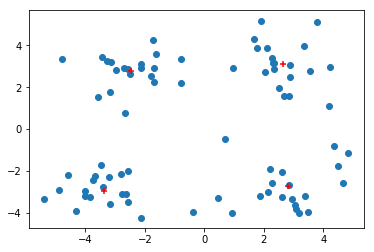

In [51]:
plt.scatter(datadf[0], datadf[1])

for i in myCentroids.A:
    plt.scatter(i[0], i[1], marker='+', c="red")
plt.show()

## 10.4. 使用后处理来提高聚类性能

一种用于度量聚类效果的指标是SSE(sum of Squared Error，误差平方和)，对应于clusterAssing矩阵的第一列的和。SSE越小表示数据点越接近于它们的质心，聚类效果也越好，因为对误差取了平方，因此更加重视哪些离中心点远的点。

## 10.5. 二分K-means算法

为了克服K-means算法收敛于局部最小值的问题，提出了二分K-means(bisecting K-means)的算法。该算法首先将所有点作为一个簇，然后将该簇一分为二。之后选择其中一个簇继续进行划分，选择哪一个簇进行划分取决于对其划分是否可以最大程度降低SSE的值。

In [72]:
def biKmeans(dataSet, k, distMeas = distEclud):
    m = dataSet.shape[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList = [centroid0]
    for j in range(m):
        clusterAssment[j,1] = distMeas(np.mat(centroid0), dataSet[j,:])**2
    
    while len(centList)<k:
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            centroidMat, splitClusterAss = kmeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = np.sum(splitClusterAss[:,1])
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0], 1])
            print("sseSplit and notSplit:",sseSplit, sseNotSplit)
            if sseSplit+sseNotSplit < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClusterAss.copy()
                lowestSSE = sseSplit + sseNotSplit
                
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        
        print("the bestCentToSplit is:", bestCentToSplit)
        print("the len of bestClustAss is ", len(bestClustAss))
        
        centList[bestCentToSplit] = bestNewCents[0,:]
        centList.append(bestNewCents[1,:])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:] = bestClustAss

    return centList, clusterAssment

In [73]:
datadf2 = pd.read_csv("testSet2.txt",sep = '\t', header = None)
dataMat2 = np.mat(datadf2)
centList, myNewAssments = biKmeans(dataMat2, 3)

[[ 4.29860009  4.55941982]
 [ 3.27130599 -1.4351638 ]]
[[ 0.28284189  3.44518831]
 [-0.77451324 -1.88247136]]
[[ 0.09338772  3.27587208]
 [-0.62407076 -2.58281924]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit and notSplit: 453.0334895807502 0.0
the bestCentToSplit is: 0
the len of bestClustAss is  60
[[ 2.1162168   3.35610864]
 [-3.59441069  0.94849045]]
[[ 2.76275171  3.12704005]
 [-3.06779095  3.33769884]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit and notSplit: 77.59224931775066 29.15724944412535
[[ 0.53035628 -1.88788629]
 [-0.21183247 -2.6660122 ]]
[[-0.40935333 -1.56898367]
 [-0.46853312 -2.99160947]]
[[-1.25177775 -1.44395175]
 [-0.26162575 -3.11178156]]
[[-1.3776246  -1.6522424 ]
 [-0.15366667 -3.15354   ]]
[[-1.41084317 -1.873139  ]
 [-0.05200457 -3.16610557]]
[[-1.31198114e+00 -1.96162114e+00]
 [-7.11923077e-04 -3.21792031e+00]]
[[-1.26873575 -2.07139688]
 [ 0.07973025 -3.24942808]]
[[-1.26405367 -2.209896  ]
 [ 0.19848727 -3.24320436]

In [74]:
centList

[matrix([[2.93386365, 3.12782785]]),
 matrix([[-0.45965615, -2.7782156 ]]),
 matrix([[-2.94737575,  3.3263781 ]])]

[[2.93386365 3.12782785]]


IndexError: index 1 is out of bounds for axis 0 with size 1

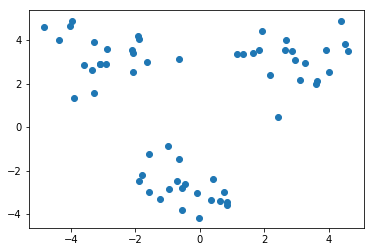

In [78]:
plt.scatter(datadf2[0], datadf2[1])

for i in centList:
    plt.scatter(i[0], i[1], marker='+', c="red")
plt.show()